In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for preprocessing
from sklearn.preprocessing import OneHotEncoder, StandardScaler, OrdinalEncoder,LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

#for evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
#models
from sklearn.linear_model import LogisticRegression
from tensorflow.keras.models import Sequential
from sklearn.naive_bayes import GaussianNB


from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report


In [ ]:
data=r'/content/Traffic.csv'
df=pd.read_csv(data)
df=pd.DataFrame(df)
df.head()

,Time,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total,Traffic Situation
0,12:00:00 AM,10,Tuesday,31,0,4,4,39,low
1,12:15:00 AM,10,Tuesday,49,0,3,3,55,low
2,12:30:00 AM,10,Tuesday,46,0,3,6,55,low
3,12:45:00 AM,10,Tuesday,51,0,2,5,58,low
4,1:00:00 AM,10,Tuesday,57,6,15,16,94,normal


In [ ]:
df.isna().sum()

,0
Time,0
Date,0
Day of the week,0
CarCount,0
BikeCount,0
BusCount,0
TruckCount,0
Total,0
Traffic Situation,0


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.describe()

,Date,CarCount,BikeCount,BusCount,TruckCount,Total
count,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000,2976.000000
mean,16.000000,68.696573,14.917339,15.279570,15.324933,114.218414
std,8.945775,45.850693,12.847518,14.341986,10.603833,60.190627
min,1.000000,6.000000,0.000000,0.000000,0.000000,21.000000
25%,8.000000,19.000000,5.000000,1.000000,6.000000,55.000000
50%,16.000000,64.000000,12.000000,12.000000,14.000000,109.000000
75%,24.000000,107.000000,22.000000,25.000000,23.000000,164.000000
max,31.000000,180.000000,70.000000,50.000000,40.000000,279.000000


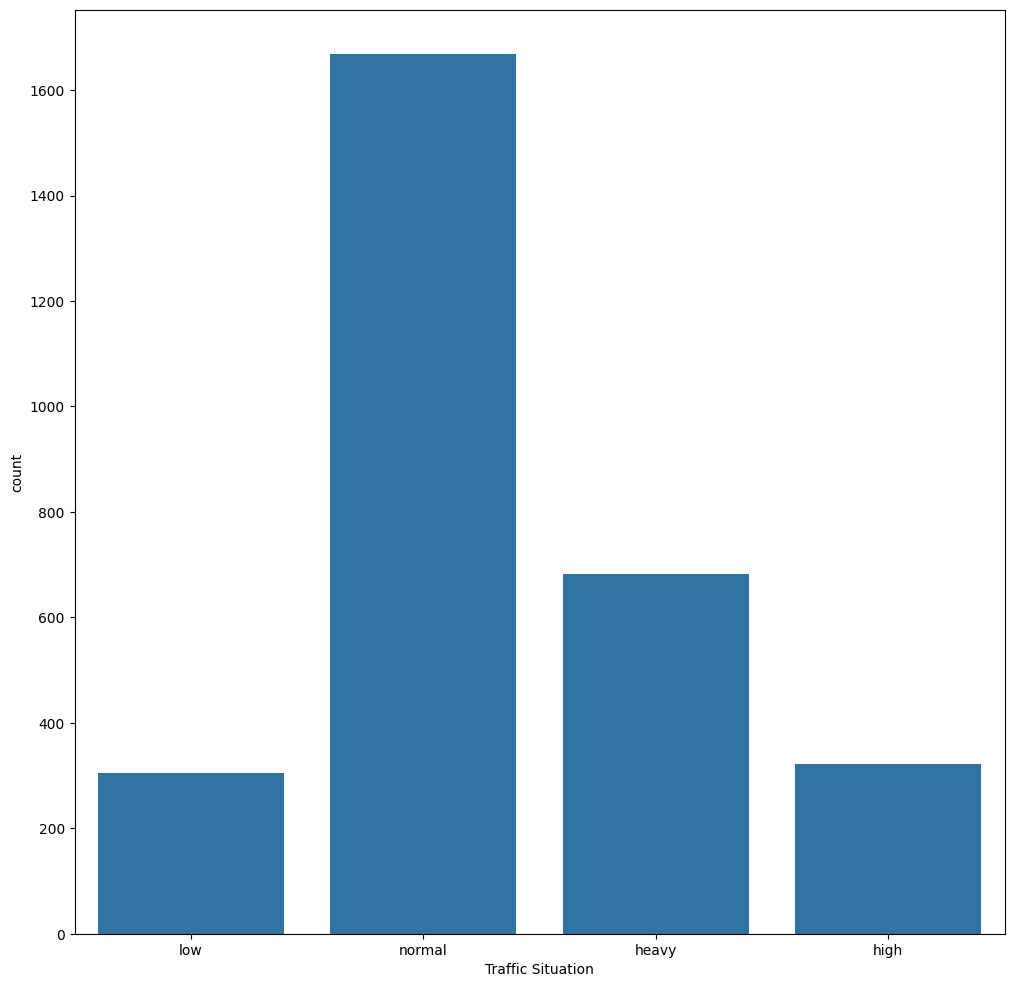

In [ ]:
#----------------------#
     # perfrom EDA
#----------------------#

plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Traffic Situation')
plt.show()

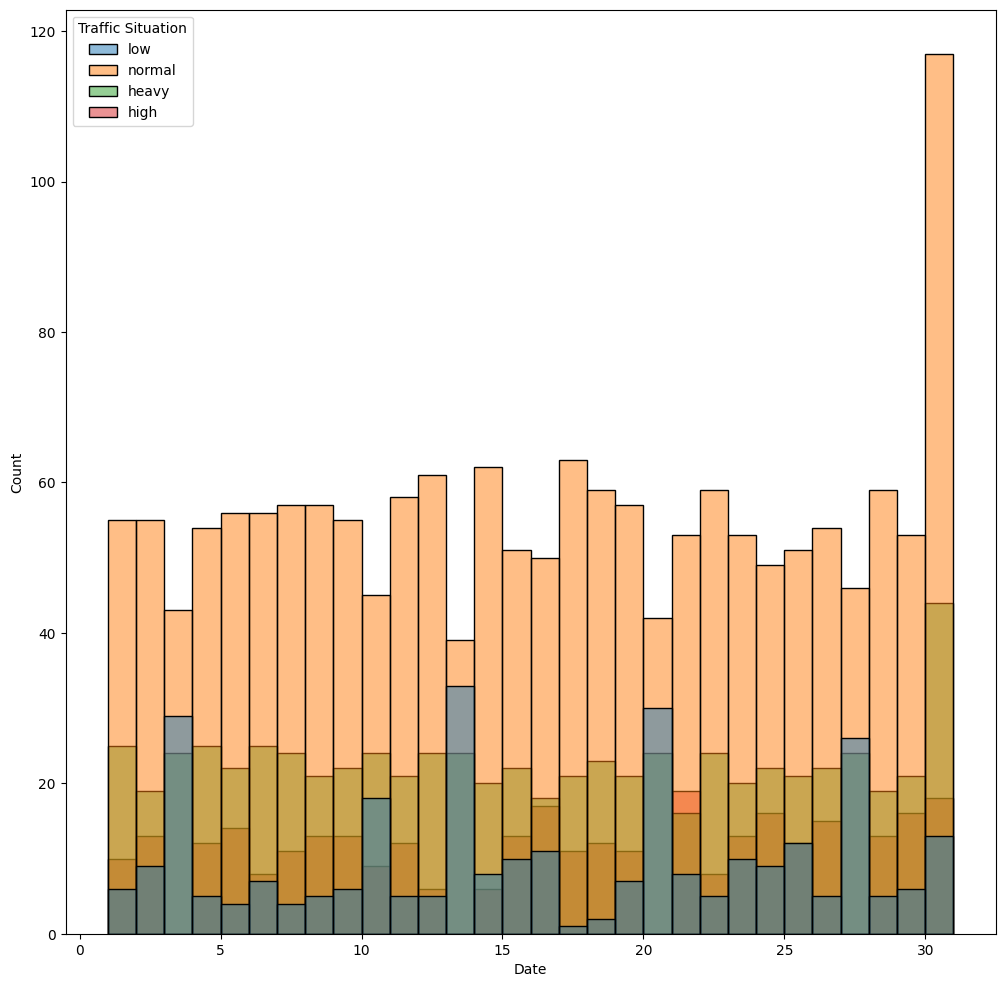

In [ ]:
plt.figure(figsize=(12,12))
sns.histplot(data=df,x='Date',hue='Traffic Situation',bins=30)
plt.show()

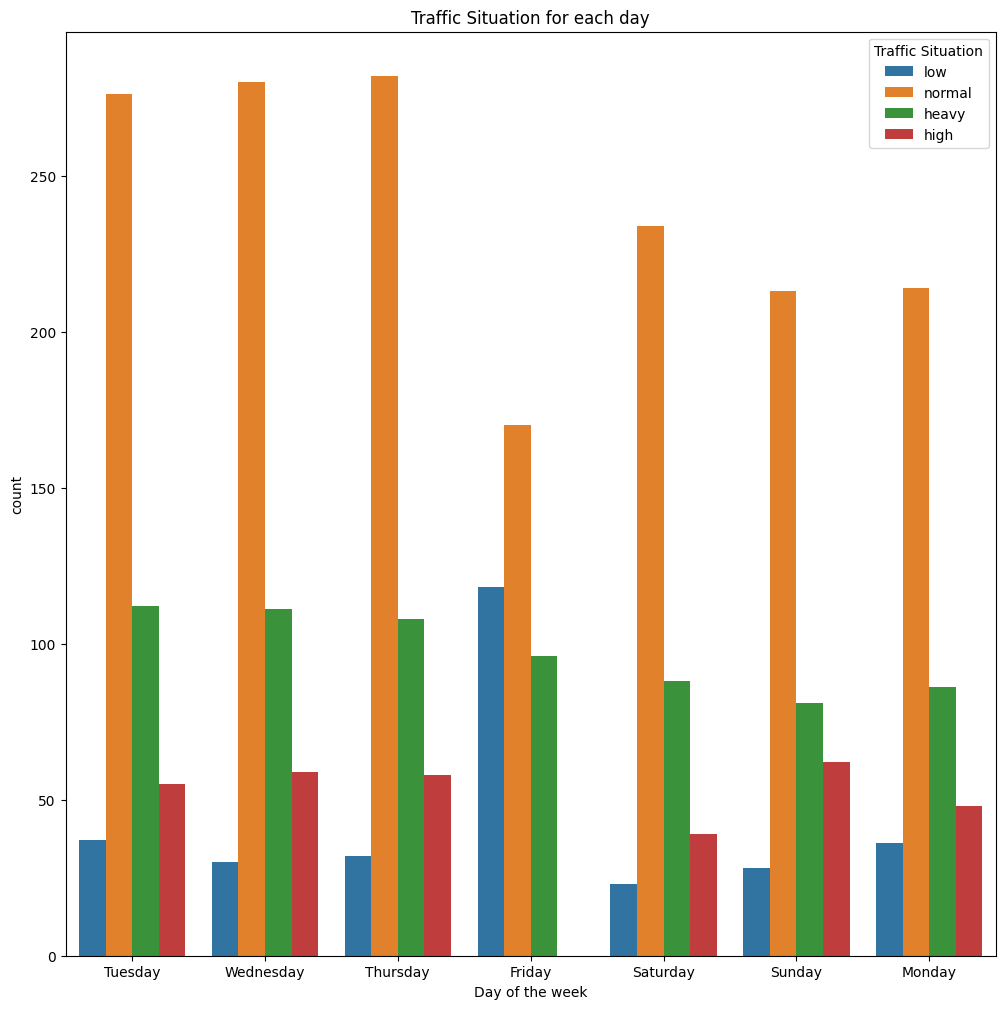

In [ ]:
plt.figure(figsize=(12,12))
sns.countplot(data=df,x='Day of the week',hue='Traffic Situation')
plt.title("Traffic Situation for each day")
plt.show()

In [ ]:
df.columns

Index(['Time', 'Date', 'Day of the week', 'CarCount', 'BikeCount', 'BusCount',
       'TruckCount', 'Total', 'Traffic Situation'],
      dtype='object')

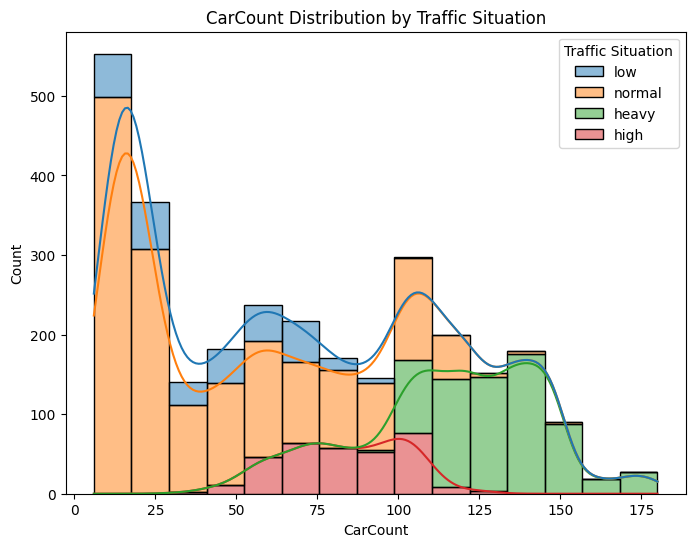

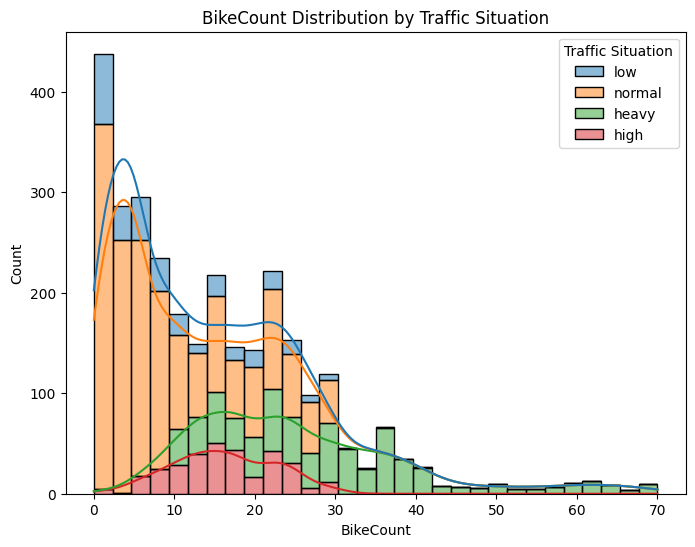

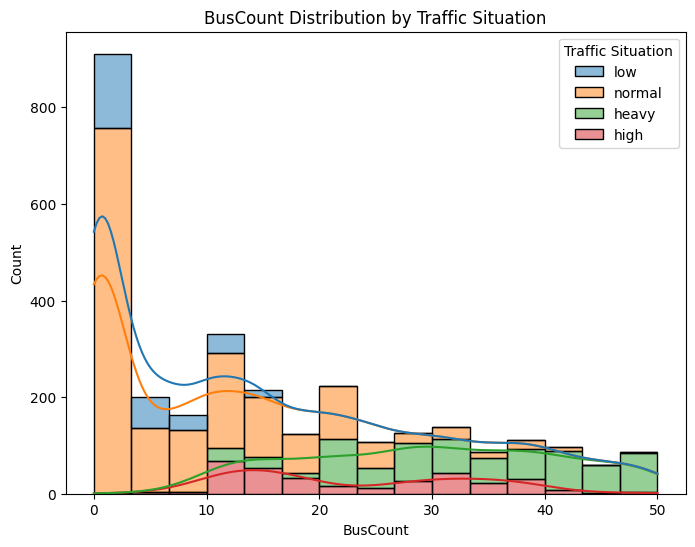

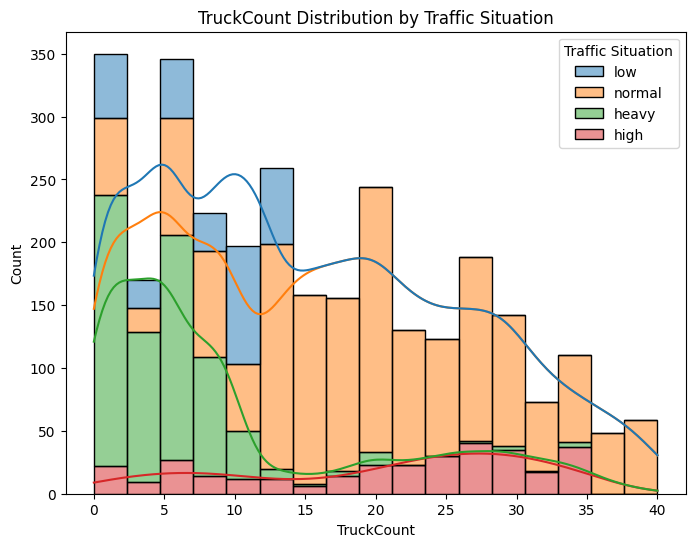

In [ ]:
vehicle_columns=['CarCount','BikeCount','BusCount','TruckCount']

for vehicle in vehicle_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(data=df, x=vehicle, hue='Traffic Situation', kde=True, multiple='stack')
    plt.title(f'{vehicle} Distribution by Traffic Situation')
    plt.show()

In [ ]:
# Machine learning model ke liye features (X) aur target label (Y) ko separate kiya gaya hai

x=df.drop(['Time','Traffic Situation'],axis=1)
y=df['Traffic Situation']

In [ ]:
x.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,10,Tuesday,31,0,4,4,39
1,10,Tuesday,49,0,3,3,55
2,10,Tuesday,46,0,3,6,55
3,10,Tuesday,51,0,2,5,58
4,10,Tuesday,57,6,15,16,94


In [ ]:
# Apply Encoding becacuse ML not understanding directly in text

le=LabelEncoder()
for col in x.select_dtypes('object').columns:
    x[col]=le.fit_transform(x[col])

In [ ]:
x.head()

,Date,Day of the week,CarCount,BikeCount,BusCount,TruckCount,Total
0,10,5,31,0,4,4,39
1,10,5,49,0,3,3,55
2,10,5,46,0,3,6,55
3,10,5,51,0,2,5,58
4,10,5,57,6,15,16,94


In [ ]:
y=le.fit_transform(y)


In [ ]:
# --------------------------
# Train / Test Split
# --------------------------
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=20,test_size=0.2)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------
# Train Logistic Regression
# --------------------------
model = LogisticRegression(max_iter=500)
model.fit(x_train, y_train)

# --------------------------
# Training Accuracy
# --------------------------
train_pred = model.predict(x_train)
train_acc = accuracy_score(y_train, train_pred)
print("Training Accuracy:", train_acc)

# --------------------------
# Testing Accuracy
# --------------------------
test_pred = model.predict(x_test)
test_acc = accuracy_score(y_test, test_pred)
print("Testing Accuracy:", test_acc)

# --------------------------
# Full Report
# --------------------------
print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_pred))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, test_pred))


Training Accuracy: 0.8613445378151261
Testing Accuracy: 0.8624161073825504

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.87      0.97      0.92       129
           1       0.90      0.64      0.75        70
           2       0.85      0.54      0.66        72
           3       0.86      0.94      0.90       325

    accuracy                           0.86       596
   macro avg       0.87      0.77      0.81       596
weighted avg       0.86      0.86      0.85       596


Confusion Matrix (Test Data):
[[125   3   0   1]
 [  8  45   0  17]
 [  0   0  39  33]
 [ 11   2   7 305]]


/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


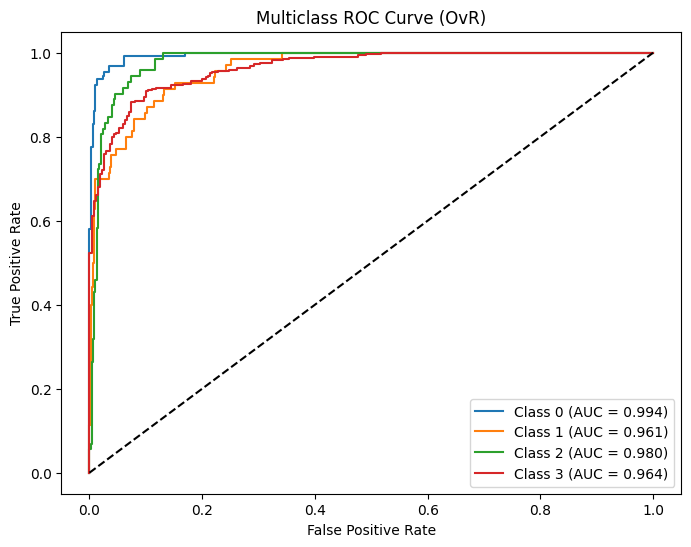

In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------------------
# 1. Binarize y_test for multiclass ROC
# -----------------------------------------
classes = np.unique(y_test)
y_test_bin = label_binarize(y_test, classes=classes)

# Predicted probabilities
y_prob = model.predict_proba(x_test)

# -----------------------------------------
# 2. ROC Curve for each class
# -----------------------------------------
plt.figure(figsize=(8,6))

for i in range(len(classes)):
    fpr, tpr, _ = roc_curve(y_test_bin[:, i], y_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Class {classes[i]} (AUC = {roc_auc:.3f})")

# Baseline
plt.plot([0, 1], [0, 1], "k--")

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (OvR)")
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import roc_auc_score

macro_auc = roc_auc_score(y_test_bin, y_prob, average="macro")
print("Macro Average AUC:", macro_auc)


Macro Average AUC: 0.9747503936226154


In [ ]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# y_test = true class labels
# y_pred = predicted probabilities from model (shape: n_samples, n_classes)
classes = np.unique(y_test)

# 1. One-hot encode y_test
y_test_bin = label_binarize(y_test, classes=classes)

# 2. MAE
mae = mean_absolute_error(y_test_bin, y_pred)
print("Mean Absolute Error (MAE):", mae)

# 3. MSE
mse = mean_squared_error(y_test_bin, y_pred)
print("Mean Squared Error (MSE):", mse)

# 4. RMSE
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# 5. R² Score
r2 = r2_score(y_test_bin, y_pred)
print("R² Score:", r2)

# 6. Adjusted R²
n = y_test_bin.shape[0]  # number of samples
p = y_pred.shape[1]      # number of predictors / classes
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)
print("Adjusted R² Score:", adj_r2)

# 7. MAPE (Mean Absolute Percentage Error)
# Add a small epsilon to avoid division by zero
epsilon = 1e-10
mape = np.mean(np.abs((y_test_bin - y_pred) / (y_test_bin + epsilon))) * 100
print("Mean Absolute Percentage Error (MAPE %):", mape)


Mean Absolute Error (MAE): 0.12012158334255219
Mean Squared Error (MSE): 0.04683005437254906
Root Mean Squared Error (RMSE): 0.21640252857244774
R² Score: 0.6877117156982422
Adjusted R² Score: 0.6855980894085518
Mean Absolute Percentage Error (MAPE %): 60060803765.88075


In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# --------------------------
# Train Naive Bayes
# --------------------------
nb_model = GaussianNB()
nb_model.fit(x_train, y_train)

# --------------------------
# Training Accuracy
# --------------------------
train_pred_nb = nb_model.predict(x_train)
train_acc_nb = accuracy_score(y_train, train_pred_nb)
print("Training Accuracy (Naive Bayes):", train_acc_nb)

# --------------------------
# Testing Accuracy
# --------------------------
test_pred_nb = nb_model.predict(x_test)
test_acc_nb = accuracy_score(y_test, test_pred_nb)
print("Testing Accuracy (Naive Bayes):", test_acc_nb)

# --------------------------
# Detailed Report
# --------------------------
print("\nClassification Report (Test Data):")
print(classification_report(y_test, test_pred_nb))

print("\nConfusion Matrix (Test Data):")
print(confusion_matrix(y_test, test_pred_nb))


Training Accuracy (Naive Bayes): 0.8130252100840336
Testing Accuracy (Naive Bayes): 0.8238255033557047

Classification Report (Test Data):
              precision    recall  f1-score   support

           0       0.89      0.98      0.93       129
           1       0.52      0.83      0.64        70
           2       0.90      0.65      0.76        72
           3       0.89      0.80      0.84       325

    accuracy                           0.82       596
   macro avg       0.80      0.81      0.79       596
weighted avg       0.85      0.82      0.83       596


Confusion Matrix (Test Data):
[[126   3   0   0]
 [  6  58   0   6]
 [  0   0  47  25]
 [  9  51   5 260]]


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 7, 32)          │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 3, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 3, 64)          │         6,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 1, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,756 (42.02 KB)

 Trainable params: 10,756 (42.02 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.4935 - loss: 3.2835 - val_accuracy: 0.7332 - val_loss: 0.7568
Epoch 2/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7025 - loss: 0.7906 - val_accuracy: 0.6912 - val_loss: 0.7284
Epoch 3/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7244 - loss: 0.6923 - val_accuracy: 0.7374 - val_loss: 0.6371
Epoch 4/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7305 - loss: 0.6377 - val_accuracy: 0.7458 - val_loss: 0.6543
Epoch 5/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7469 - loss: 0.6296 - val_accuracy: 0.7563 - val_loss: 0.6247
Epoch 6/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7363 - loss: 0.6005 - val_accuracy: 0.7353 - val_loss: 0.5864
Epoch 7/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7348 - loss: 0.5957 - val_accuracy: 0.6912 - val_loss: 0.6490
Epoch 8/20
119/119 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7661 - loss: 0.5725 - val_accuracy: 0.

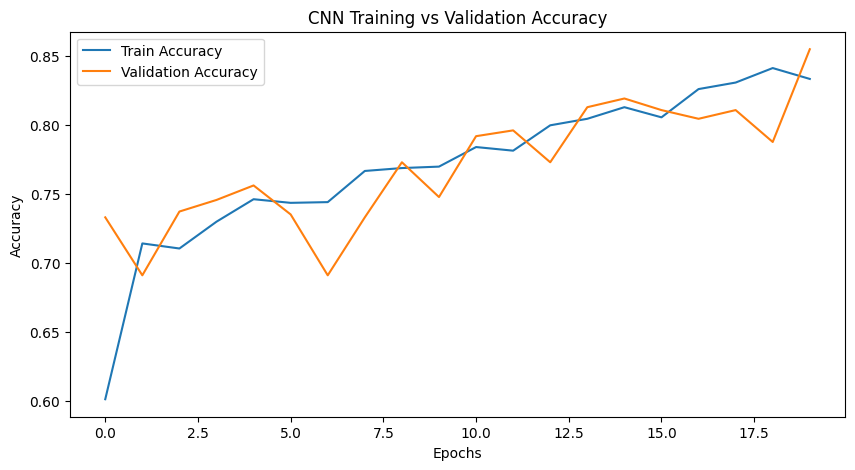

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


# -------------------------------
# 3. Features & Target
# -------------------------------
x = df.drop(['Time','Traffic Situation'], axis=1)
y = df['Traffic Situation']

# -------------------------------
# 4. Encode categorical features in x
# -------------------------------
le_x = LabelEncoder()
for col in x.select_dtypes('object').columns:
    x[col] = le_x.fit_transform(x[col])

# Ensure numeric type for TensorFlow
x = x.astype(np.float32)

# -------------------------------
# 5. Encode target y
# -------------------------------
le_y = LabelEncoder()
y = le_y.fit_transform(y)

# -------------------------------
# 6. Train/Test Split
# -------------------------------
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# -------------------------------
# 7. Reshape for 1D-CNN
# -------------------------------
x_train_cnn = np.array(x_train).reshape(x_train.shape[0], x_train.shape[1], 1)
x_test_cnn  = np.array(x_test).reshape(x_test.shape[0], x_test.shape[1], 1)

# Number of classes
num_classes = len(np.unique(y))

# -------------------------------
# 8. Build 1D-CNN Model
# -------------------------------
model = Sequential([
    Conv1D(32, kernel_size=3, activation='relu', padding='same', input_shape=(x_train_cnn.shape[1],1)),
    MaxPooling1D(2),
    Conv1D(64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# -------------------------------
# 9. Train Model
# -------------------------------
history = model.fit(
    x_train_cnn, y_train,
    epochs=20,
    batch_size=16,
    validation_split=0.2,
    verbose=1
)

# -------------------------------
# 10. Evaluate Accuracy
# -------------------------------
train_loss, train_acc = model.evaluate(x_train_cnn, y_train, verbose=0)
test_loss, test_acc   = model.evaluate(x_test_cnn, y_test, verbose=0)

print("\nTraining Accuracy (CNN):", train_acc)
print("Testing Accuracy (CNN):", test_acc)

# -------------------------------
# 11. Predictions & Report
# -------------------------------
y_pred = model.predict(x_test_cnn)
y_pred_classes = np.argmax(y_pred, axis=1)

print("\nClassification Report:\n", classification_report(y_test, y_pred_classes))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_classes))

# -------------------------------
# 12. Plot Training vs Validation Accuracy
# -------------------------------
plt.figure(figsize=(10,5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Training vs Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# -------------------------------
# 13. Plot Training vs Validation Loss
# ----------


In [ ]:
# New record as DataFrame
new_data = pd.DataFrame({
    'Date': [11],
    'Day of the week': ['Wednesday'],
    'CarCount': [40],
    'BikeCount': [2],
    'BusCount': [3],
    'TruckCount': [4],
    'Total': [49]
})

# Encode categorical features same as training
for col in new_data.select_dtypes('object').columns:
    new_data[col] = le_x.transform(new_data[col])

# Convert to float32
new_data = new_data.astype(np.float32)

# Reshape for CNN
new_data_cnn = new_data.values.reshape(1, new_data.shape[1], 1)


In [ ]:
# Prediction
pred_prob = model.predict(new_data_cnn)         # Probabilities
pred_class = np.argmax(pred_prob, axis=1)       # Class index

# Convert back to original label
pred_label = le_y.inverse_transform(pred_class)

print("Predicted Traffic Situation:", pred_label[0])


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Predicted Traffic Situation: low
